A number of different models were tested at once here that take feature maps of various sizes from different sections of the backbone resnet and add the height channel, which is then used by the RPN and the RoI head. 

In [127]:
# So that packages are automatically reloaded if analysis functions need to be updated
%load_ext autoreload
%autoreload 2
# We need to include the module in the path
import pathlib
import sys
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
# Set up path stuff (to orient the notebook within the package structure)
module_path = pathlib.Path.cwd()
base_dir = module_path.parent.absolute()
model_dir = base_dir / "models" / "trained"
sys.path.append(str(base_dir))
# Now we can import package modules
from src.analysis.analysis_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
print("Loading run data...")
df = get_dataframe(model_dir, taskname=["seedlings_pre_rpn", "seedlings_pre_rpn_2"])
df = get_runs_data(df)
# Now remove the duplicate columns from - and _ metric naming
df = repair_mixed_metrics(df)

Loading run data...
Reading run info from server
Run 0 of 23 (0.00%)
Run 10 of 23 (43.48%)
Run 20 of 23 (86.96%)
Finished reading run info from server


In [120]:
# Filter out the prev ones
matches = df[("params", "task_name")] == "seedlings_pre_rpn_2"
df = df.loc[matches]
df = clean_names(df)

ValueError: Length of values (0) does not match length of index (20)

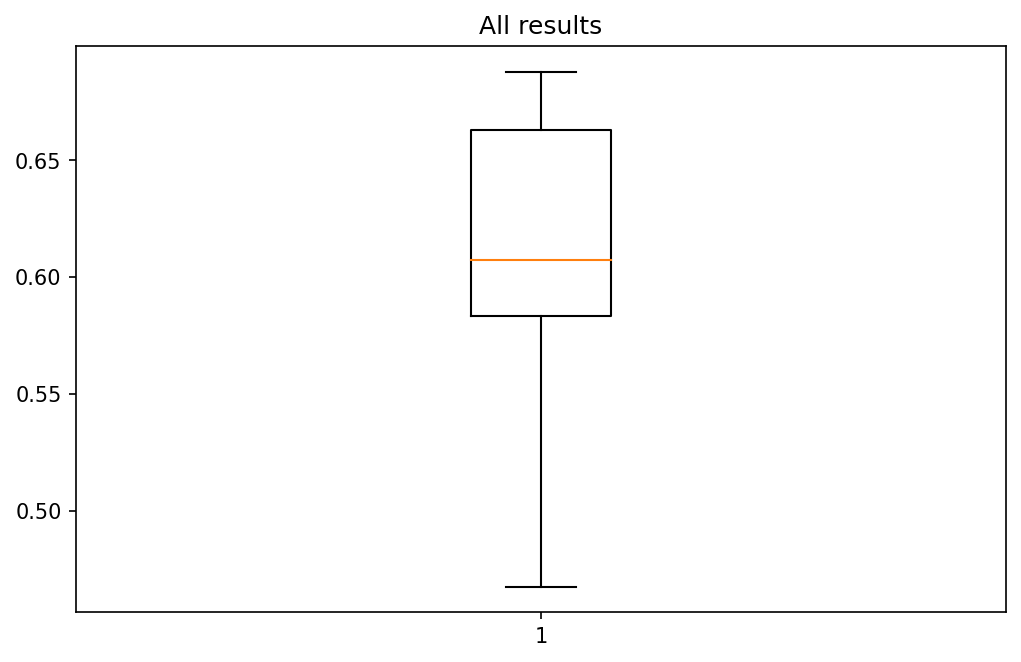

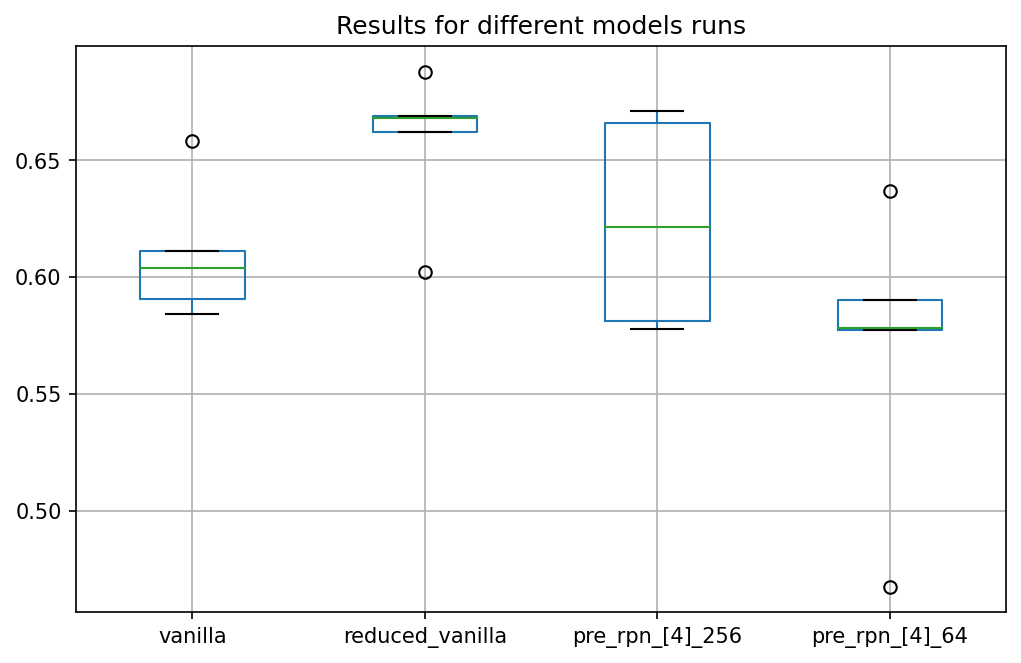

In [128]:

all_params = ["base_model_path", "data_file"]
params = ["base_model_path"]
metrics = ["test_MAP"]
model_names = ["vanilla", "reduced_vanilla", "pre_rpn_[4]_256", "pre_rpn_[4]_64"]
boxplot(df, all_params, params, metrics , model_names)

The results seem pretty inconclusive, without any clear winner (with the exception maybe of the vanilla model with smaller backbone)